In [1]:
from funkcije import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
combined_data = load_data()

In [3]:
combined_data['DatumPN'] = pd.to_datetime(combined_data['DatumPN'], format='%d.%m.%Y')
combined_data['Weekday'] = combined_data['DatumPN'].dt.day_name()
combined_data['Day'] = combined_data['DatumPN'].dt.day
combined_data['Month'] = combined_data['DatumPN'].dt.month
combined_data['Year'] = combined_data['DatumPN'].dt.year

In [4]:
classification_colors = {
    'Z MATERIALNO ŠKODO': '#377eb8',  
    'Z LAŽJO TELESNO POŠKODBO': '#4daf4a', 
    'S HUDO TELESNO POŠKODBO': '#ff7f00',  
    'S SMRTNIM IZIDOM': '#e41a1c'  
}

In [5]:
first_date = combined_data['DatumPN'].min()
last_date = combined_data['DatumPN'].max()

days = (last_date - first_date).days
weeks = days // 7
months = (last_date.year - first_date.year) * 12 + (last_date.month - first_date.month)
years = combined_data['Year'].nunique()
days, weeks, months, years 

(5477, 782, 179, 15)

# Najnevarnejši meseci

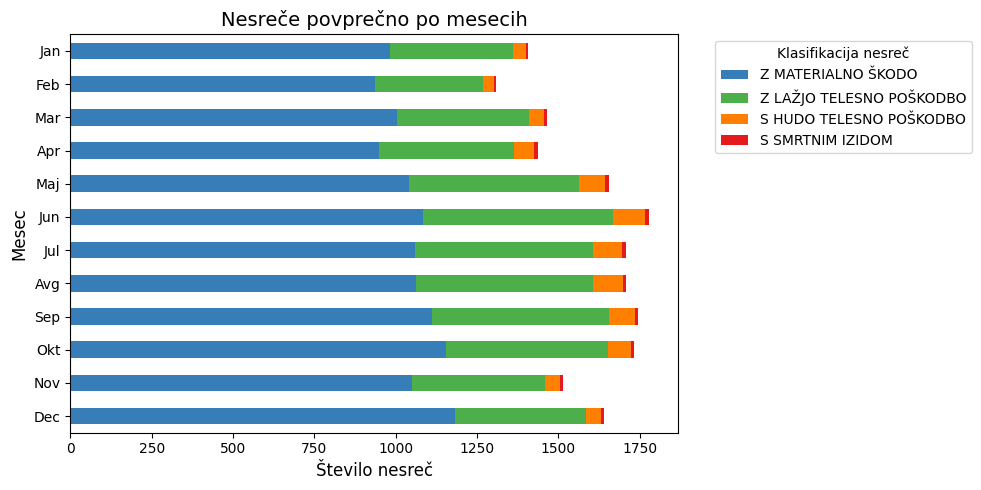

In [6]:
unique_accidents = combined_data.groupby('ZaporednaStevilkaPN').first()

stacked_data = unique_accidents.groupby(['Month', 'KlasifikacijaNesrece']).size().unstack(fill_value=0)

ordered_columns = ['Z MATERIALNO ŠKODO', 'Z LAŽJO TELESNO POŠKODBO', 'S HUDO TELESNO POŠKODBO', 'S SMRTNIM IZIDOM']
stacked_data[ordered_columns] = stacked_data[ordered_columns] / years

stacked_data = stacked_data[ordered_columns]
stacked_data = stacked_data.reindex(
    range(12, 0, -1),
    axis=0
)

stacked_data.plot(
    kind='barh',
    stacked=True,
    color=[classification_colors.get(col, 'gray') for col in stacked_data.columns],
    figsize=(10, 5)
)

plt.title('Nesreče povprečno po mesecih', fontsize=14)
plt.xlabel('Število nesreč', fontsize=12)
plt.ylabel('Mesec', fontsize=12)
plt.yticks(range(0, 12), ['Dec', 'Nov', 'Okt', 'Sep', 'Avg', 'Jul', 'Jun', 'Maj', 'Apr', 'Mar', 'Feb', 'Jan'])
plt.legend(title='Klasifikacija nesreč', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

# Najnevarnejši dnevi v tednu

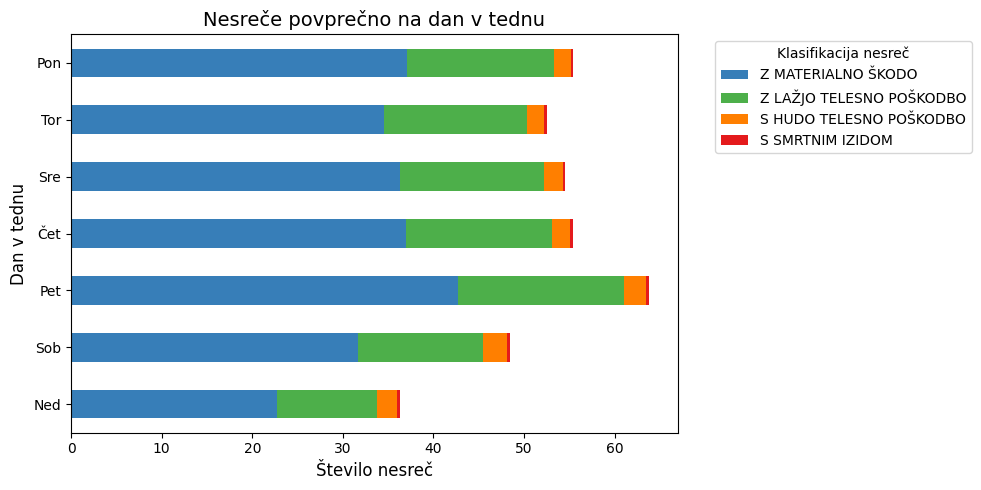

In [7]:
unique_accidents = combined_data.groupby('ZaporednaStevilkaPN').first()

stacked_data = unique_accidents.groupby(['Weekday', 'KlasifikacijaNesrece']).size().unstack(fill_value=0)

ordered_columns = ['Z MATERIALNO ŠKODO', 'Z LAŽJO TELESNO POŠKODBO', 'S HUDO TELESNO POŠKODBO', 'S SMRTNIM IZIDOM']
stacked_data[ordered_columns] = stacked_data[ordered_columns] / weeks

stacked_data = stacked_data[ordered_columns]
stacked_data = stacked_data.reindex(
    ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday'],
    axis=0
)

stacked_data.plot(
    kind='barh',
    stacked=True,
    color=[classification_colors.get(col, 'gray') for col in stacked_data.columns],
    figsize=(10, 5)
)

plt.title('Nesreče povprečno na dan v tednu', fontsize=14)
plt.xlabel('Število nesreč', fontsize=12)
plt.ylabel('Dan v tednu', fontsize=12)
plt.yticks(range(0, 7), ['Ned', 'Sob', 'Pet', 'Čet', 'Sre', 'Tor', 'Pon'])
plt.legend(title='Klasifikacija nesreč', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

# Vpliv praznikov

In [8]:
def get_easter_date(year):
    a = year % 19
    b = year // 100
    c = year % 100
    d = b // 4
    e = b % 4
    f = (b + 8) // 25
    g = (b - f + 1) // 3
    h = (19 * a + b - d - g + 15) % 30
    i = c // 4
    k = c % 4
    l = (32 + 2 * e + 2 * i - h - k) % 7
    m = (a + 11 * h + 22 * l) // 451
    month = (h + l - 7 * m + 114) // 31
    day = ((h + l - 7 * m + 114) % 31) + 1
    return month, day

In [9]:
# https://www.gov.si/teme/drzavni-prazniki-in-dela-prosti-dnevi/
holidays = dict() # {'datum': 'praznik'}
def add_holiday(date, name):
    if date < first_date or date > last_date:
        return
    if date in holidays:
        if isinstance(holidays[date], list):
            holidays[date].append(name)
        else:
            holidays[date] = [holidays[date], name]
    else:
        holidays[date] = name

for year in range(first_date.year, last_date.year + 1):
    add_holiday(pd.to_datetime(f"{year}-01-01"), 'novo leto')
    add_holiday(pd.to_datetime(f"{year}-01-02"), 'novo leto')
    add_holiday(pd.to_datetime(f"{year}-02-08"), 'Prešernov dan, slovenski kulturni praznik')
    add_holiday(pd.to_datetime(f"{year}-04-27"), 'dan upora proti okupatorju')
    add_holiday(pd.to_datetime(f"{year}-05-01"), 'praznik dela')
    add_holiday(pd.to_datetime(f"{year}-05-02"), 'praznik dela')
    add_holiday(pd.to_datetime(f"{year}-06-08"), 'dan Primoža Trubarja')
    add_holiday(pd.to_datetime(f"{year}-06-25"), 'dan državnosti')
    add_holiday(pd.to_datetime(f"{year}-08-15"), 'Marijino vnebovzetje')
    add_holiday(pd.to_datetime(f"{year}-08-17"), 'združitev prekmurskih Slovencev z matičnim narodom')
    add_holiday(pd.to_datetime(f"{year}-09-15"), 'priključitev Primorske k matični domovini')
    add_holiday(pd.to_datetime(f"{year}-09-23"), 'dan slovenskega športa')
    add_holiday(pd.to_datetime(f"{year}-10-25"), 'dan suverenosti')
    add_holiday(pd.to_datetime(f"{year}-10-31"), 'dan reformacije')
    add_holiday(pd.to_datetime(f"{year}-11-01"), 'dan spomina na mrtve')
    add_holiday(pd.to_datetime(f"{year}-11-10"), 'dan znanosti')
    add_holiday(pd.to_datetime(f"{year}-11-23"), 'dan Rudolfa Maistra')
    add_holiday(pd.to_datetime(f"{year}-12-25"), 'božič')
    add_holiday(pd.to_datetime(f"{year}-12-26"), 'dan samostojnosti in enotnosti')

    month, day = get_easter_date(year)
    easter_date = pd.to_datetime(f"{year}-{month}-{day}")

    add_holiday(easter_date, 'velikonočna nedelja')
    add_holiday(easter_date + pd.Timedelta(days=1), 'velikonočni ponedeljek')
    add_holiday(easter_date + pd.Timedelta(days=49), 'binkoštna nedelja')

In [10]:
def get_holiday_occurence_count(holiday):
    if holiday == 'ni praznik':
        return days - len(holidays)
    i = 0
    for date in holidays:
        if isinstance(holidays[date], list):
            if holiday in holidays[date]:
                i += 1
        else:
            if holidays[date] == holiday:
                i += 1
    return i

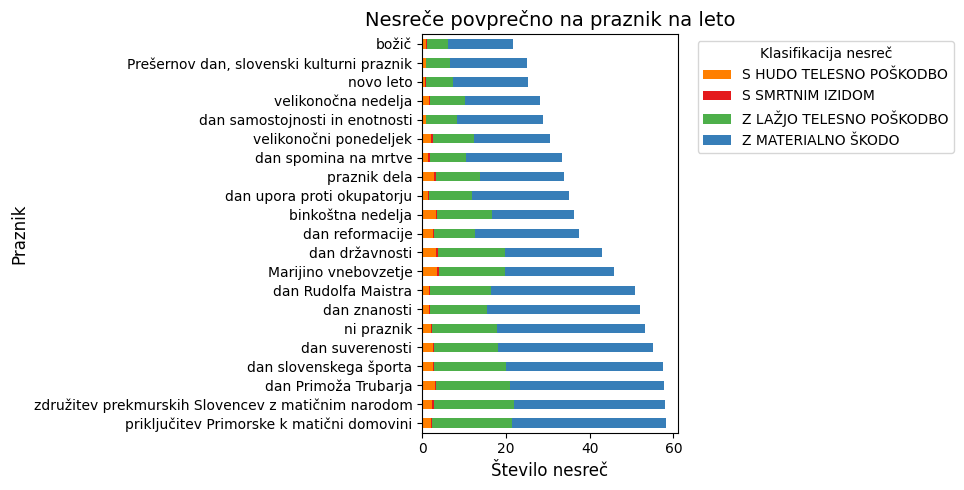

In [11]:
holiday_accidents = combined_data.copy()
holiday_accidents['Holiday'] = holiday_accidents['DatumPN'].map(holidays)
holiday_accidents = holiday_accidents.explode('Holiday') # 2014-06-08 je dan Rudolfa Maistra in binkoštna nedelja
holiday_accidents['Holiday'] = holiday_accidents['Holiday'].fillna('ni praznik')
holiday_accidents = holiday_accidents.groupby('ZaporednaStevilkaPN').first()

stacked_data = holiday_accidents.groupby(['Holiday', 'KlasifikacijaNesrece'], dropna=False).size().unstack(fill_value=0)

ordered_columns = ['Z MATERIALNO ŠKODO', 'Z LAŽJO TELESNO POŠKODBO', 'S HUDO TELESNO POŠKODBO', 'S SMRTNIM IZIDOM']
for col in ordered_columns:
    stacked_data[col] = stacked_data.apply(
        lambda row: row[col] / get_holiday_occurence_count(row.name),
        axis=1
    )

stacked_data = stacked_data.loc[stacked_data.sum(axis=1).sort_values(ascending=False).index]

stacked_data.plot(
    kind='barh',
    stacked=True,
    color=[classification_colors.get(col, 'gray') for col in stacked_data.columns],
    figsize=(10, 5)
)

plt.title('Nesreče povprečno na praznik na leto', fontsize=14)
plt.xlabel('Število nesreč', fontsize=12)
plt.ylabel('Praznik', fontsize=12)

plt.legend(title='Klasifikacija nesreč', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

In [12]:
work_free_holidays = dict()
work_free_holidays['novo leto']                                             = True
work_free_holidays['Prešernov dan, slovenski kulturni praznik']             = True
work_free_holidays['velikonočna nedelja']                                   = True
work_free_holidays['velikonočni ponedeljek']                                = True
work_free_holidays['dan upora proti okupatorju']                            = True
work_free_holidays['praznik dela']                                          = True
work_free_holidays['binkoštna nedelja']                                     = True
work_free_holidays['dan Primoža Trubarja']                                  = False
work_free_holidays['dan državnosti']                                        = True
work_free_holidays['Marijino vnebovzetje']                                  = True
work_free_holidays['združitev prekmurskih Slovencev z matičnim narodom']    = False
work_free_holidays['priključitev Primorske k matični domovini']             = False
work_free_holidays['dan slovenskega športa']                                = False
work_free_holidays['dan suverenosti']                                       = False
work_free_holidays['dan reformacije']                                       = True
work_free_holidays['dan spomina na mrtve']                                  = True
work_free_holidays['dan znanosti']                                          = False
work_free_holidays['dan Rudolfa Maistra']                                   = False
work_free_holidays['božič']                                                 = True
work_free_holidays['dan samostojnosti in enotnosti']                        = True
work_free_holidays['ni praznik']                                            = False

work_free_count = list(work_free_holidays.values()).count(True)
work_free_count # dela prostih dni na leto


13

In [13]:
def get_work_free_occurence_count(name):
    if name == True:
        return years * work_free_count
    else:
        return days - years * work_free_count

C:\Users\Blaž Jelen\AppData\Local\Temp\ipykernel_19388\4033191863.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  work_free_accidents['WorkFree'] = work_free_accidents['WorkFree'].fillna(False)


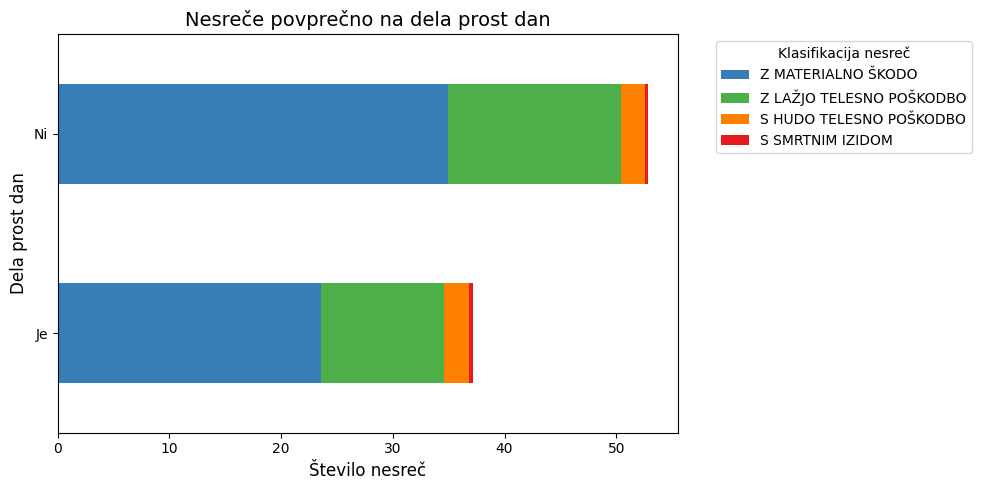

In [14]:
work_free_accidents = combined_data.copy()
work_free_accidents['Holiday'] = work_free_accidents['DatumPN'].map(holidays)
work_free_accidents = work_free_accidents.explode('Holiday') # 2014-06-08 je dan Rudolfa Maistra in binkoštna nedelja
work_free_accidents['WorkFree'] = work_free_accidents['Holiday'].map(work_free_holidays)
work_free_accidents['WorkFree'] = work_free_accidents['WorkFree'].fillna(False)
work_free_accidents = work_free_accidents.groupby('ZaporednaStevilkaPN').first()

stacked_data = work_free_accidents.groupby(['WorkFree', 'KlasifikacijaNesrece']).size().unstack(fill_value=0)

ordered_columns = ['Z MATERIALNO ŠKODO', 'Z LAŽJO TELESNO POŠKODBO', 'S HUDO TELESNO POŠKODBO', 'S SMRTNIM IZIDOM']
for col in ordered_columns:
    stacked_data[col] = stacked_data.apply(
        lambda row: row[col] / get_work_free_occurence_count(row.name),
        axis=1
    )

stacked_data = stacked_data[ordered_columns]
stacked_data = stacked_data.reindex(
    [True, False],
    axis=0
)

stacked_data.plot(
    kind='barh',
    stacked=True,
    color=[classification_colors.get(col, 'gray') for col in stacked_data.columns],
    figsize=(10, 5)
)

plt.title('Nesreče povprečno na dela prost dan', fontsize=14)
plt.xlabel('Število nesreč', fontsize=12)
plt.ylabel('Dela prost dan', fontsize=12)
plt.yticks(range(0, 2), ['Je', 'Ni'])
plt.legend(title='Klasifikacija nesreč', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()